In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/IR - 7.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [4]:
train = X_train.append(y_train)
train

,DE,FE,Fault
103476,0.062585,0.041091,0
96984,-0.075102,-0.013765,0
114732,-0.048190,-0.001233,0
10916,0.069260,0.028558,0
37646,0.040054,0.065335,0
...,...,...,...
45891,0.110131,-0.312085,1
117952,-0.909962,-0.030202,1
42613,0.676380,0.007396,1
43567,0.011208,0.209975,1


In [5]:
test = X_test.append(y_test)
test

,DE,FE,Fault
121079,0.046313,0.054651,0
107924,-0.015855,0.061636,0
22678,-0.065297,0.122862,0
55190,-0.112652,0.066978,0
92048,0.023991,0.034105,0
...,...,...,...
103358,0.019330,0.088962,1
54412,-0.072284,0.288664,1
50632,0.259571,-0.293184,1
89251,0.010883,-0.042324,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [7]:
train = train.values.reshape(-1, 1, 3)

test  = test.values.reshape(-1, 1, 3)

In [8]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [9]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 3)              99        
Total params: 13,027
Trainable params: 13,027
Non-trainable params: 0
__________________________________________________

In [10]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Train on 174463 samples, validate on 19385 samples
Epoch 1/100
174463/174463 [==============================] - 7s 38us/step - loss: 0.1247 - accuracy: 0.4565 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 2/100
174463/174463 [==============================] - 3s 16us/step - loss: 0.0153 - accuracy: 0.7470 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 3/100
174463/174463 [==============================] - 3s 15us/step - loss: 0.0127 - accuracy: 0.7682 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 4/100
174463/174463 [==============================] - 3s 15us/step - loss: 0.0111 - accuracy: 0.7827 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 5/100
174463/174463 [==============================] - 3s 15us/step - loss: 0.0099 - accuracy: 0.7841 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 6/100
174463/174463 [==============================] - 3s 14us/step - loss: 0.0089 - accuracy: 0.7907 - val_loss: 0.0049 - val_accuracy: 0.9999
Epoch 7/100
174463/174463 [======================

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.119680). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 28us/step - loss: 0.0025 - accuracy: 0.9025 - val_loss: 3.3321e-04 - val_accuracy: 1.0000
Epoch 47/100
174463/174463 [==============================] - 5s 28us/step - loss: 0.0025 - accuracy: 0.9078 - val_loss: 3.2943e-04 - val_accuracy: 1.0000
Epoch 48/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0025 - accuracy: 0.9093 - val_loss: 3.5414e-04 - val_accuracy: 1.0000
Epoch 49/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0025 - accuracy: 0.9104 - val_loss: 3.3337e-04 - val_accuracy: 1.0000
Epoch 50/100
174463/174463 [==============================] - 5s 28us/step - loss: 0.0024 - accuracy: 0.9121 - val_loss: 3.6567e-04 - val_accuracy: 1.0000
Epoch 51/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0024 - accuracy: 0.9137 - val_loss: 3.5228e-04 - val_accuracy: 1.0000
Epoch 52/100
174463/174463 [==============================] - 5s 27us/step - loss: 

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.140624). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 26us/step - loss: 0.0023 - accuracy: 0.9157 - val_loss: 2.2429e-04 - val_accuracy: 1.0000
Epoch 80/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0022 - accuracy: 0.9143 - val_loss: 2.4320e-04 - val_accuracy: 1.0000
Epoch 81/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0022 - accuracy: 0.9144 - val_loss: 2.6561e-04 - val_accuracy: 1.0000
Epoch 82/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0022 - accuracy: 0.9149 - val_loss: 2.3860e-04 - val_accuracy: 1.0000
Epoch 83/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0023 - accuracy: 0.9150 - val_loss: 2.2636e-04 - val_accuracy: 1.0000
Epoch 84/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0023 - accuracy: 0.9163 - val_loss: 2.7107e-04 - val_accuracy: 1.0000
Epoch 85/100
174463/174463 [==============================] - 5s 27us/step - loss: 

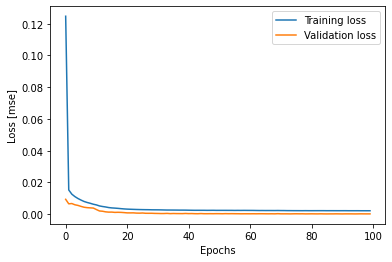

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss [mse]')
plt.show()

In [12]:
pred_train = model.predict(train)

In [13]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

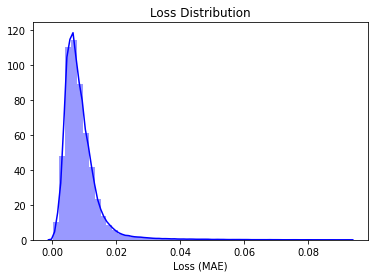

In [14]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [15]:
TH = 0.04
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [16]:
scored_train['Loss_mae'].mean()

0.008895124278198743

Text(0, 0.5, 'Loss (MAE)')

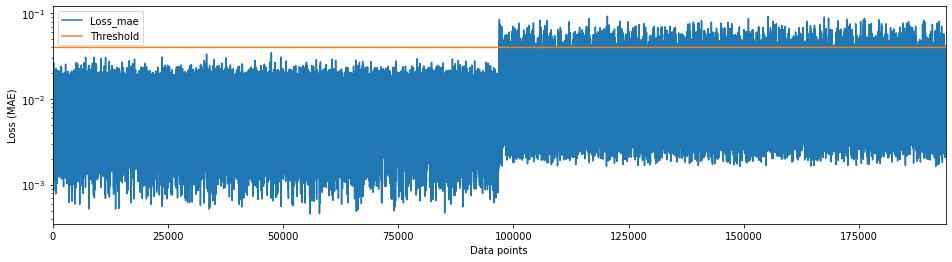

In [17]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [18]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.004295,0.04,False
1,0.009432,0.04,False
2,0.006575,0.04,False
3,0.003956,0.04,False
4,0.004896,0.04,False
...,...,...,...
193843,0.009220,0.04,False
193844,0.028058,0.04,False
193845,0.017317,0.04,False
193846,0.008115,0.04,False


In [19]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
96942   0.048011       0.04     True
96957   0.084770       0.04     True
96992   0.046025       0.04     True
97034   0.073953       0.04     True
97141   0.042432       0.04     True
...          ...        ...      ...
193149  0.048319       0.04     True
193184  0.048453       0.04     True
193452  0.057634       0.04     True
193550  0.046190       0.04     True
193698  0.041741       0.04     True

[1239 rows x 3 columns]
(1239, 3)


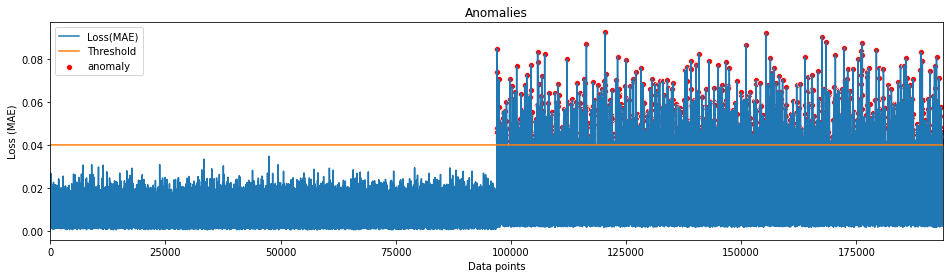

In [20]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [21]:
pred_test = model.predict(test)

In [22]:
score = model.evaluate(test,test)
score

48462/48462 [==============================] - 2s 46us/step


[0.00016768147337455866, 0.9632701873779297]

In [23]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

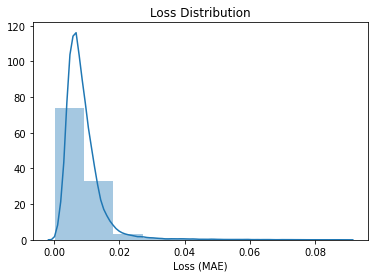

In [24]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [25]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.004469,0.04,False
1,0.006157,0.04,False
2,0.010950,0.04,False
3,0.012621,0.04,False
4,0.001381,0.04,False
...,...,...,...
48457,0.006165,0.04,False
48458,0.005912,0.04,False
48459,0.009731,0.04,False
48460,0.006534,0.04,False


In [26]:
scored_test['Loss_mae'].mean()

0.008934638598789938

Text(0, 0.5, 'Loss (MAE)')

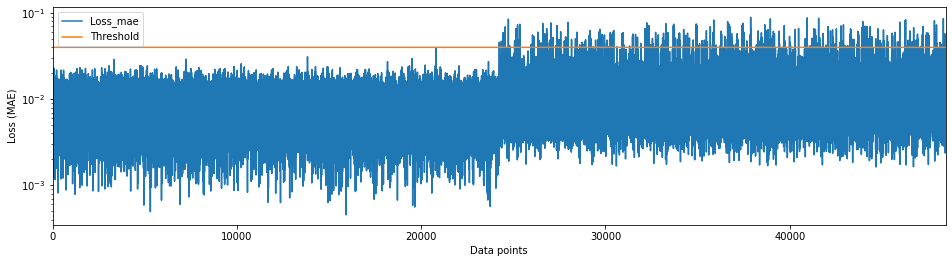

In [27]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [28]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

       Loss_mae  Threshold  Anomaly
24236  0.045971       0.04     True
24347  0.047062       0.04     True
24446  0.059300       0.04     True
24459  0.047777       0.04     True
24504  0.046869       0.04     True
...         ...        ...      ...
48259  0.043463       0.04     True
48298  0.043772       0.04     True
48339  0.086465       0.04     True
48389  0.053578       0.04     True
48416  0.057603       0.04     True

[350 rows x 3 columns]
(350, 3)


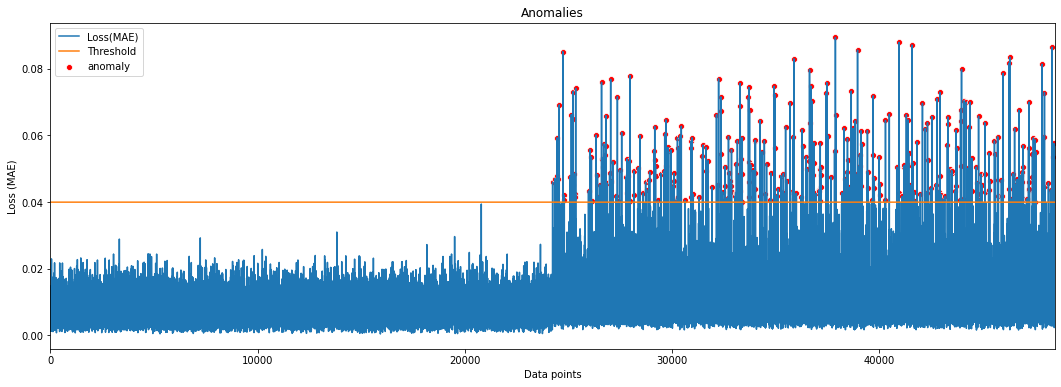

In [29]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [30]:
print(score[1])

0.9632701873779297


In [31]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 96.33%


In [32]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))

Anomalies: 350


In [33]:
# Seperating Normal and Faulty dataset
x = scored_test['Anomaly'].count() / 2

In [34]:
normal_test = scored_test[scored_test.index < x]
normal_test

,Loss_mae,Threshold,Anomaly
0,0.004469,0.04,False
1,0.006157,0.04,False
2,0.010950,0.04,False
3,0.012621,0.04,False
4,0.001381,0.04,False
...,...,...,...
24226,0.011776,0.04,False
24227,0.007734,0.04,False
24228,0.005965,0.04,False
24229,0.009470,0.04,False


In [35]:
IR_test = scored_test[scored_test.index >= x]
IR_test

,Loss_mae,Threshold,Anomaly
24231,0.004791,0.04,False
24232,0.010997,0.04,False
24233,0.004732,0.04,False
24234,0.006876,0.04,False
24235,0.006204,0.04,False
...,...,...,...
48457,0.006165,0.04,False
48458,0.005912,0.04,False
48459,0.009731,0.04,False
48460,0.006534,0.04,False


In [36]:
TP = normal_test[normal_test['Anomaly'] == False]
TP = TP['Anomaly'].count()
print("True Positives: {}".format(TP))

FP = normal_test[normal_test['Anomaly'] == True]
FP = FP['Anomaly'].count()
print("False Positives: {}".format(FP))

TN = IR_test[IR_test['Anomaly'] == True]
TN = TN['Anomaly'].count()
print("True Negatives: {}".format(TN))

FN = IR_test[IR_test['Anomaly'] == False]
FN = FN['Anomaly'].count()
print("False Negatives: {}".format(FN))

True Positives: 24231
False Positives: 0
True Negatives: 350
False Negatives: 23881


In [37]:
Precision = TP / (TP + FP)
print("Precision: {:.2f}%".format(Precision*100))

Recall = TP / (TP + FN)
print("Recall: {:.3f}%".format(Recall*100))

F1Score = (2*Precision*Recall)/(Precision+Recall)
print("F1 Score: {:.2f}%".format(F1Score*100))

Accuracy = ( TP + TN ) / ( TP + TN + FN + FP )
print("Accuracy: {:.2f}%".format(Accuracy*100))

Precision: 100.00%
Recall: 50.364%
F1 Score: 66.99%
Accuracy: 50.72%
